<a href="https://colab.research.google.com/github/pranamyasin/projects/blob/main/mpg_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from numpy.random import seed

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/collab/mpg.csv")

In [ ]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
df=pd.DataFrame(data)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
df['cylinders']=df.cylinders.astype(float)           #Converted objects and integers to floating charachters so tha it can easily split into train and test dataset
df['horsepower']=df.cylinders.astype(float)

In [ ]:
df.dtypes

mpg             float64
cylinders       float64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
aD= df.drop(['car name'],axis=1)                   #Dropped or removed car names since in each case car had a unique name
aD

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,307.0,8.0,3504,12.0,70,1
1,15.0,8.0,350.0,8.0,3693,11.5,70,1
2,18.0,8.0,318.0,8.0,3436,11.0,70,1
3,16.0,8.0,304.0,8.0,3433,12.0,70,1
4,17.0,8.0,302.0,8.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,4.0,2790,15.6,82,1
394,44.0,4.0,97.0,4.0,2130,24.6,82,2
395,32.0,4.0,135.0,4.0,2295,11.6,82,1
396,28.0,4.0,120.0,4.0,2625,18.6,82,1


In [ ]:
aD.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,307.0,8.0,3504,12.0,70,1
1,15.0,8.0,350.0,8.0,3693,11.5,70,1
2,18.0,8.0,318.0,8.0,3436,11.0,70,1
3,16.0,8.0,304.0,8.0,3433,12.0,70,1
4,17.0,8.0,302.0,8.0,3449,10.5,70,1


In [ ]:
aD.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [ ]:
aD.isnull().sum().sum()

0

In [ ]:
train,test=train_test_split(aD)

In [ ]:
x = aD.iloc[:,[1,2,3,4,5,6,7]].values   
x

array([[  8. , 307. ,   8. , ...,  12. ,  70. ,   1. ],
       [  8. , 350. ,   8. , ...,  11.5,  70. ,   1. ],
       [  8. , 318. ,   8. , ...,  11. ,  70. ,   1. ],
       ...,
       [  4. , 135. ,   4. , ...,  11.6,  82. ,   1. ],
       [  4. , 120. ,   4. , ...,  18.6,  82. ,   1. ],
       [  4. , 119. ,   4. , ...,  19.4,  82. ,   1. ]])

In [ ]:
y = aD.iloc[:,0].values    
y

array([18. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
       14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 26. , 25. , 24. ,
       25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 25. ,
       19. , 16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. ,
       13. , 18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 35. ,
       27. , 26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. ,
       17. , 11. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. ,
       22. , 21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. ,
       14. , 15. , 12. , 13. , 13. , 14. , 13. , 12. , 13. , 18. , 16. ,
       18. , 18. , 23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. ,
       22. , 18. , 19. , 21. , 26. , 15. , 16. , 29. , 24. , 20. , 19. ,
       15. , 24. , 20. , 11. , 20. , 21. , 19. , 15. , 31. , 26. , 32. ,
       25. , 16. , 16. , 18. , 16. , 13. , 14. , 14. , 14. , 29. , 26. ,
       26. , 31. , 32. , 28. , 24. , 26. , 24. , 26

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, train_size=0.70, random_state=0)

In [ ]:
x_train

array([[  8. , 350. ,   8. , ...,  11.4,  77. ,   1. ],
       [  4. , 119. ,   4. , ...,  14.8,  81. ,   3. ],
       [  8. , 304. ,   8. , ...,  15.5,  74. ,   1. ],
       ...,
       [  4. ,  68. ,   4. , ...,  19.5,  73. ,   2. ],
       [  6. , 250. ,   6. , ...,  15. ,  71. ,   1. ],
       [  4. ,  90. ,   4. , ...,  16.5,  75. ,   2. ]])

In [ ]:
x_train.shape

(278, 7)

In [ ]:
scaling = StandardScaler()             # Scaling of test and train data is done by -1 to +1

In [ ]:
x_train_scaled = scaling.fit_transform(x_train)
x_test_scaled = scaling.fit_transform(x_test)

In [ ]:
x_train_scaled[0]

array([ 1.46928422,  1.52136174,  1.46928422,  1.39191857, -1.58408089,
        0.24712922, -0.72500822])

In [ ]:
x_train_scaled[0].shape

(7,)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(5, activation='relu',input_shape=x_train_scaled[0].shape))     #Dense neurons are taken in form of 2/3*i/p(7)+o/p(1)=5
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 40        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers[1].get_weights()

[array([[ 0.0230391 ],
        [-0.13694692],
        [ 0.77662873],
        [ 0.48174334],
        [ 0.40399432]], dtype=float32), array([0.], dtype=float32)]

In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
tf.random.set_seed(0)             #random seed is used to control randomness and make the model efficient

In [ ]:
model_fit = model.fit(x_train_scaled,y_train,epochs= 500,validation_split=0.05)         

Epoch 1/500
9/9 [==============================] - 1s 35ms/step - loss: 579.8964 - val_loss: 458.1513
Epoch 2/500
9/9 [==============================] - 0s 9ms/step - loss: 577.4951 - val_loss: 455.9390
Epoch 3/500
9/9 [==============================] - 0s 7ms/step - loss: 575.0732 - val_loss: 453.6155
Epoch 4/500
9/9 [==============================] - 0s 6ms/step - loss: 572.5433 - val_loss: 451.1363
Epoch 5/500
9/9 [==============================] - 0s 6ms/step - loss: 569.9086 - val_loss: 448.5313
Epoch 6/500
9/9 [==============================] - 0s 8ms/step - loss: 567.1599 - val_loss: 445.8618
Epoch 7/500
9/9 [==============================] - 0s 8ms/step - loss: 564.3111 - val_loss: 443.0850
Epoch 8/500
9/9 [==============================] - 0s 8ms/step - loss: 561.2263 - val_loss: 440.2451
Epoch 9/500
9/9 [==============================] - 0s 9ms/step - loss: 558.1232 - val_loss: 437.2833
Epoch 10/500
9/9 [==============================] - 0s 8ms/step - loss: 554.8253 - val_los

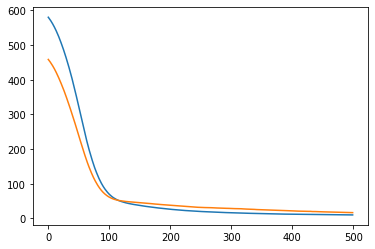

In [ ]:
pd.Series(model_fit.history['loss']).plot(kind='line')
pd.Series(model_fit.history['val_loss']).plot(kind='line') 

In [ ]:
y_pred = model.predict(x_test_scaled)
y_pred.reshape(1,-1)

array([[15.216387 , 22.894045 , 15.8349495, 15.165407 , 14.478905 ,
        29.743807 , 33.590733 , 23.302387 , 15.798574 , 26.030502 ,
        36.042183 , 34.707348 , 16.15529  , 25.54988  , 15.420702 ,
        35.187973 , 30.288513 , 27.81569  , 13.85787  , 30.299437 ,
        14.418703 , 23.730757 , 23.97016  , 16.472    , 32.525227 ,
        22.32018  , 35.50906  , 33.26016  , 29.785154 , 14.551125 ,
        18.802004 , 29.474901 , 19.517529 , 31.88701  , 19.572287 ,
        22.49136  , 17.25448  , 15.341234 , 32.34545  , 12.13415  ,
        14.994375 , 15.963474 , 26.293993 , 33.577763 , 28.43388  ,
        19.641273 , 19.406815 , 14.034555 , 22.826527 , 28.402914 ,
        30.716679 , 25.106798 , 15.389732 , 25.745949 , 15.883053 ,
        15.133324 , 14.858297 , 23.452316 , 30.871824 , 16.173569 ,
        19.422487 , 23.379236 , 16.52345  , 15.981007 , 13.799419 ,
        13.738878 , 14.467392 , 14.524    , 22.76354  , 15.347807 ,
        36.44786  , 14.217737 , 16.723377 , 16.0

In [ ]:
y_test

array([14. , 25. , 13. , 21. , 18. , 35. , 34.1, 20. , 15. , 23.5, 40.9,
       37.2, 18. , 23. , 15.5, 35.7, 31. , 27. , 18. , 37.3, 15.5, 23. ,
       24. , 18. , 34.5, 25.4, 36.1, 34. , 30. , 16. , 18.6, 37. , 15. ,
       33.5, 22.4, 24. , 19. , 16.9, 31.9, 12. , 14. , 15. , 27.4, 23.7,
       32. , 24. , 22.5, 16.5, 21. , 26. , 41.5, 29. , 15. , 30. , 15. ,
       10. , 18. , 20.2, 36. , 17. , 18. , 26.5, 18. , 22. , 12. , 14. ,
       15. , 18. , 23. , 14. , 32.3, 13. , 25. , 20. , 24. , 30.9, 26. ,
       32. , 24.5, 11. , 15. , 27. , 34.3, 26. , 31.6, 33.8, 29. , 18.1,
       27.2, 38. , 26. , 14. , 22. , 31. , 36.4, 17.6, 17.7, 28. , 20.8,
       14. , 20.2, 32.8, 22.3, 28. , 37. , 27. , 23.2, 13. , 15. , 22. ,
       24. , 29. , 13. , 31.8, 23. , 25.5, 29.9, 13. , 17.5, 46.6])

In [ ]:
r2_score(y_test,y_pred)                 

0.8172106121839692

In [ ]:
mean_squared_error(y_test,y_pred)

11.680586007854348

In [ ]:
# with 600 epochs the model was undergping overfitting , so 500 epochs was good to go!
# Obtained an accuracy of 81% indicating that the model is efficient enough to be used 